In [1]:
import pandas as pd

In [18]:
# Load files into a pandas dataframe
train_values = pd.read_csv('./train_values.csv')
train_labels = pd.read_csv('./train_labels.csv')
test_values = pd.read_csv('./test_values.csv')
submission_format = pd.read_csv('../submission_format (1).csv')

In [19]:
merged_train = pd.merge(train_values, train_labels, on='building_id')

In [20]:
# Combining trained values with test values
combined_data = pd.concat([merged_train, test_values], ignore_index=True)
combined_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347464,310028,4,605,3623,3,70,20,6,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347465,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,NaN
347466,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347467,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,NaN


# Data Exploration and Cleaning

In [21]:
print(combined_data.head())
combined_data.dtypes

   building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...         

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [22]:
combined_data[['building_id','damage_grade']]
# test_values.columns

,building_id,damage_grade
0,802906,3.0
1,28830,2.0
2,94947,3.0
3,590882,2.0
4,201944,3.0
...,...,...
347464,310028,NaN
347465,663567,NaN
347466,1049160,NaN
347467,442785,NaN


In [23]:
combined_data.isna().sum()

building_id                                   0
geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                        0
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick  

In [24]:
# Check for duplicates
duplicates = combined_data.duplicated()
print(duplicates.sum())

0


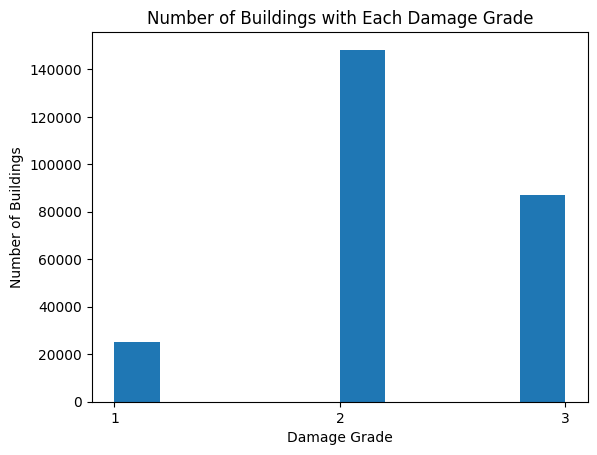

In [25]:
# Visualizing most damaged levels
import matplotlib.pyplot as plt

damage = combined_data['damage_grade']

plt.hist(damage)
plt.title('Number of Buildings with Each Damage Grade')
plt.xlabel('Damage Grade')
plt.xticks([1,2,3],['1','2','3'])
plt.ylabel('Number of Buildings')

plt.show()

In [26]:
print('It appears most buildings experienced level 2 damage')

It appears most buildings experienced level 2 damage


In [27]:
# Trying to see which features are objects
combined_data.select_dtypes(include=['object'])

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
347464,t,r,q,f,q,t,d,w
347465,n,r,n,f,q,s,d,v
347466,t,r,n,f,j,s,d,v
347467,t,r,n,f,q,s,d,a


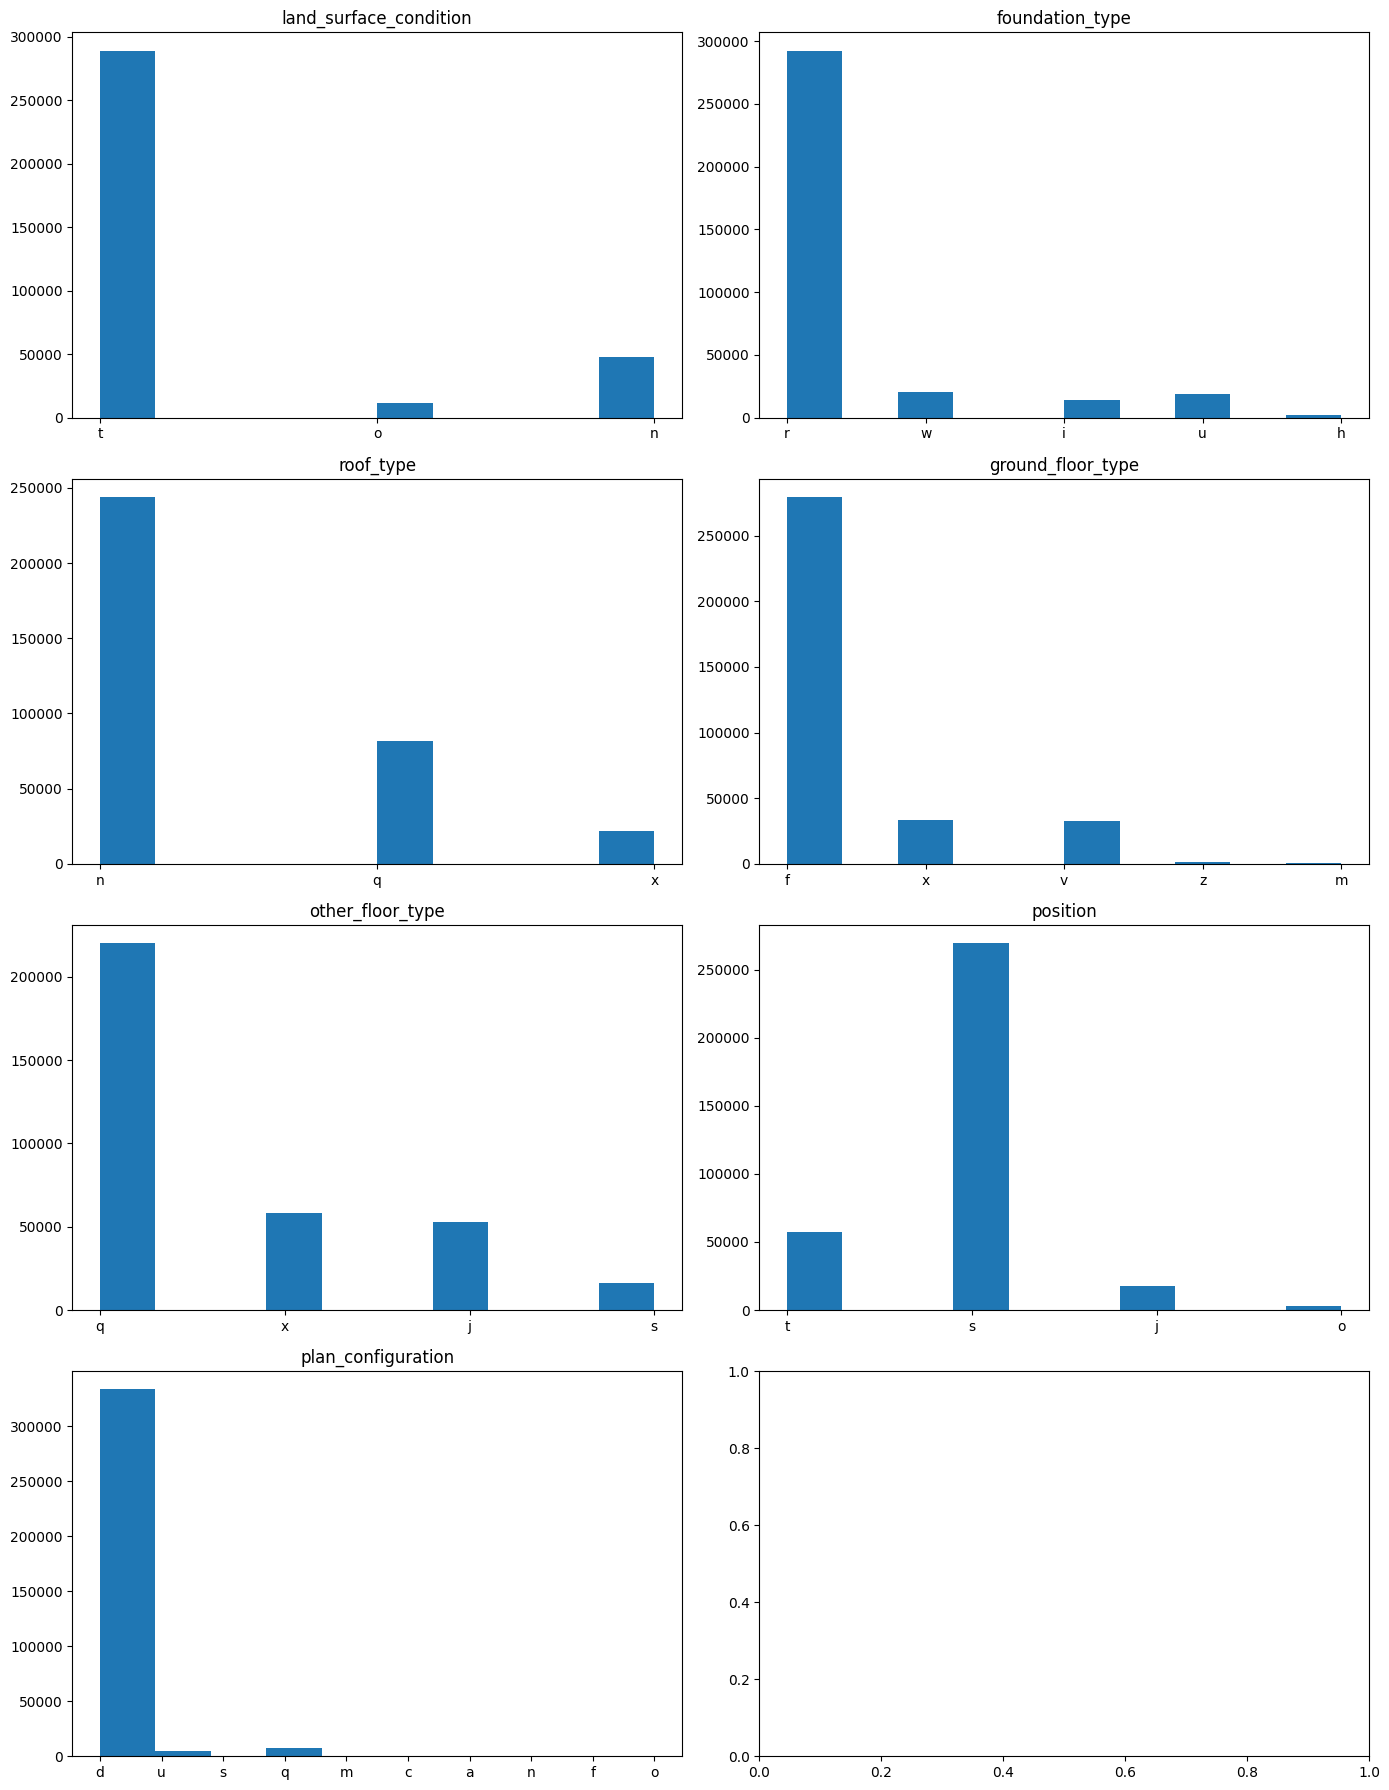

In [28]:
import matplotlib.pyplot as plt

# Creating a figure and axis for each variable
fig, axs = plt.subplots(4, 2, figsize=(14, 18))  # 4 rows, 2 columns

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Plotting each variable as a histogram
variables = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
             'other_floor_type', 'position', 'plan_configuration']

for i, var in enumerate(variables):
    axs[i].hist(combined_data[var])
    axs[i].set_title(var)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [29]:
print('Since there are ascii variables, histograms were used to see which variable category appeared most frequently')

Since there are ascii variables, histograms were used to see which variable category appeared most frequently


# Preprocessing Data

First, we need to hot_encode the variables; including the ascii ones

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize label encoder and one-hot encoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False to get a non-sparse matrix

# Create a copy of the DataFrame to avoid modifying the original DataFrame within the loop
combined_data_encoded = combined_data.copy()
combined_data_encoded = combined_data_encoded.drop(columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

# Iterate over each categorical variable and apply encoding
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':  # Check if the column is categorical
        # Use label encoding
        combined_data_encoded[column + '_label_encoded'] = label_encoder.fit_transform(combined_data[column])

        # Use one-hot encoding
        one_hot_encoded_array = one_hot_encoder.fit_transform(combined_data_encoded[[column]])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=[f"{column}_{int(i)}" for i in range(one_hot_encoded_array.shape[1])])
        combined_data_encoded = pd.concat([combined_data_encoded, one_hot_encoded_df], axis=1)

        # Drop the original categorical column and the label encoded column
        combined_data_encoded.drop([column, column + '_label_encoded'], axis=1, inplace=True)

# Now merged_train_encoded should have all categorical variables replaced with one-hot encoded columns
combined_data2 = combined_data_encoded

In [31]:
# Adding back columns
columns_to_add_back = combined_data[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

# Concatenate the extracted columns to the front of merged_train
combined_data = pd.concat([columns_to_add_back, combined_data_encoded], axis=1)

# Cleaned Data
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_4,plan_configuration_5,plan_configuration_6,plan_configuration_7,plan_configuration_8,plan_configuration_9,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2,legal_ownership_status_3
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Creating a new feature
combined_data['volume'] = combined_data['area_percentage'] * combined_data['height_percentage']

combined_data['damage_grade']

0         3.0
1         2.0
2         3.0
3         2.0
4         3.0
         ... 
347464    NaN
347465    NaN
347466    NaN
347467    NaN
347468    NaN
Name: damage_grade, Length: 347469, dtype: float64

Using ensemble methods for optimal feature selection

# Train/Test Split 

In [33]:
# Split the data into training and testing sets
train_data = combined_data[combined_data['damage_grade'].notnull()]
test_data = combined_data[combined_data['damage_grade'].isnull()]

In [67]:
# Training the model, using Train_data. Will use Test Data to find damage_grade after 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure 'damage_grade' is treated as categorical
train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')

# Training set
X = train_data.drop(columns=['damage_grade'])
y = train_data['damage_grade'].map({1: 0, 2: 1, 3: 2}) 



/var/folders/93/r_nbn0pj2jb1d097mhf6q5ww0000gn/T/ipykernel_74460/688661136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')


In [68]:
y.head()

0    2
1    1
2    2
3    1
4    2
Name: damage_grade, dtype: category
Categories (3, int64): [0, 1, 2]

# Trying with LightGBM

In [36]:
!pip install lightgbm

In [75]:
# !pip install --upgrade dask
!pip install dask\[dataframe\]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 27.7 MB/s eta 0:00:0000:0100:01


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variables
# Use a smaller sample for initial feature selection
sample_size = 5000  # Adjust the sample size as needed
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=42)

# Ensure column names are preserved in X_sample
X_sample = X_sample.copy()


# USING RFECV TO FIND BEST FEATURES
def perform_rfecv(estimator, X_sample, y_sample, cv_folds=3):
    # Initialize RFECV
    rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(cv_folds), scoring='f1_micro', n_jobs=-1)
    
    # Fit RFECV on the sample
    rfecv.fit(X_sample, y_sample)

    # Get the optimal number of features
    optimal_num_features = rfecv.n_features_
    print(f"Optimal number of features: {optimal_num_features}")

    # Get the feature rankings
    feature_ranking = pd.DataFrame({
        'Feature': X_sample.columns,
        'Ranking': rfecv.ranking_
    }).sort_values(by='Ranking')

    # Get the selected features
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
    print(f"Selected features: {selected_features}")

    # Print the rankings of all features
    print(feature_ranking)

    # Return selected features, feature ranking, and the RFECV object
    return selected_features, rfecv.ranking_, rfecv

# LightGBM (Boosting)
print("LightGBM Feature Selection")
lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)
selected_features_lgbm, feature_ranking_lgbm, rfecv_lgbm = perform_rfecv(lgbm, X_sample, y_sample, cv_folds=3)

# Cross-validation for LightGBM with selected features
print("Cross-validation for LightGBM with selected features")
X_selected_lgbm = X.loc[:, selected_features_lgbm]
cross_val_scores_lgbm = cross_val_score(lgbm, X_selected_lgbm, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"LightGBM cross-validation accuracy: {cross_val_scores_lgbm.mean()}")



LightGBM Feature Selection
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 55
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start training from score -1.094819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 55
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 54
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start training from score -1.094819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 53
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start tr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 38
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start training from score -1.094819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 37
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start tr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 22
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start training from score -1.094819
Optimal number of features: 22
Selected features: ['building_id', 'position_2', 'other_floor_type_1', 'ground_floor_type_2', 'ground_floor_type_0', 'roof_type_1', 'roof_type_0', 'foundation_type_2', 'land_surface_condition_2', 'count_families', 'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', 'volume', 'geo_level_2_id', 'height_percentage', 'age', 'count_floors_pre_eq', 'geo_level_3_id', 'geo_level_1_id', 'area_percentage', 'has_su

In [90]:
X_selected_lgbm.columns

Index(['building_id', 'position_2', 'other_floor_type_1',
       'ground_floor_type_2', 'ground_floor_type_0', 'roof_type_1',
       'roof_type_0', 'foundation_type_2', 'land_surface_condition_2',
       'count_families', 'has_superstructure_bamboo',
       'has_superstructure_timber', 'has_superstructure_cement_mortar_brick',
       'volume', 'geo_level_2_id', 'height_percentage', 'age',
       'count_floors_pre_eq', 'geo_level_3_id', 'geo_level_1_id',
       'area_percentage', 'has_superstructure_mud_mortar_stone'],
      dtype='object')

In [80]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
from sklearn.model_selection import train_test_split

# Ensure y_sample is a 1D array or Series
if isinstance(y_sample, pd.DataFrame):
    y_sample = y_sample.squeeze()

# Align indices and reset index
X_selected_lgbm = X_selected_lgbm.reset_index(drop=True)
y_sample = y_sample.reset_index(drop=True)

# Print shapes for debugging
print(f"Shape of X_selected_lgbm: {X_selected_lgbm.shape}")
print(f"Length of y_sample: {len(y_sample)}")

# Re-align data if necessary
X_selected_lgbm = X_selected_lgbm.loc[y_sample.index]

# Ensure X_selected_lgbm and y_sample have the same number of samples
assert len(y_sample) == X_selected_lgbm.shape[0], "Mismatch between number of samples in X_selected_lgbm and y_sample"

# Initialize and fit the LightGBM model
best_lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)
best_lgbm.fit(X_selected_lgbm, y_sample)

# Predictions for the train set
y_train_pred_lgbm = best_lgbm.predict(X_selected_lgbm)

# Print confusion matrix and classification report
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_sample, y_train_pred_lgbm))

print("Train Set Classification Report:")
print(classification_report(y_sample, y_train_pred_lgbm))

# Calculate and print the accuracy for the train set
train_accuracy = accuracy_score(y_sample, y_train_pred_lgbm)
print("Train Set Accuracy:", train_accuracy)


Shape of X_selected_lgbm: (260601, 22)
Length of y_sample: 5000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 22
[LightGBM] [Info] Start training from score -2.339249
[LightGBM] [Info] Start training from score -0.563875
[LightGBM] [Info] Start training from score -1.094819
Train Set Confusion Matrix:
[[ 217  234   31]
 [   0 2813   32]
 [   0  579 1094]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       482
           1       0.78      0.99      0.87      2845
           2       0.95      0.65      0.77      1673

    accuracy                           0.82      5000
   macro avg       0.91      0.70 

In [85]:

# Select the same columns in test_data as in X_selected_rf using .loc
test_data_selected = test_data.loc[:, X_selected_lgbm.columns]

# Append the damage_grade column to the end using .loc
test_data_selected.loc[:, 'damage_grade'] = test_data['damage_grade']

# Verify the columns
# print(test_data_selected.columns)


# test_data_selected.head()
X_selected_lgbm.head()


,building_id,position_2,other_floor_type_1,ground_floor_type_2,ground_floor_type_0,roof_type_1,roof_type_0,foundation_type_2,land_surface_condition_2,count_families,...,has_superstructure_cement_mortar_brick,volume,geo_level_2_id,height_percentage,age,count_floors_pre_eq,geo_level_3_id,geo_level_1_id,area_percentage,has_superstructure_mud_mortar_stone
0,802906,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,...,0,30,487,5,30,2,12198,6,6,1
1,28830,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1,...,0,56,900,7,10,2,2812,8,8,1
2,94947,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,...,0,25,363,5,10,2,8973,21,5,1
3,590882,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,...,0,30,418,5,10,2,10694,22,6,1
4,201944,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,...,0,72,131,9,30,3,1488,11,8,0


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 3334, number of used features: 52
[LightGBM] [Info] Start training from score -2.337377
[LightGBM] [Info] Start training from score -0.563899
[LightGBM] [Info] Start training from score -1.095318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 3334, number of used features: 52
[LightGBM] [Info] Start training from score -2.337377
[LightGBM] [Info] Start training from score -0.563899
[LightGBM] [Info] Start tr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 51
[LightGBM] [Info] Start training from score -2.340187
[LightGBM] [Info] Start training from score -0.564126
[LightGBM] [Info] Start training from score -1.094122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 51
[LightGBM] [Info] Start training from score -2.340187
[LightGBM] [Info] Start training from score -0.564126
[LightGBM] [Info] Start tr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 52
[LightGBM] [Info] Start training from score -2.340187
[LightGBM] [Info] Start training from score -0.563599
[LightGBM] [Info] Start training from score -1.095018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 52
[LightGBM] [Info] Start training from score -2.340187
[LightGBM] [Info] Start training from score -0.563599
[LightGBM] [Info] Start tr

In [86]:
# Train the RandomForest model using the selected features from the training set

# Best Features with y target 
X_selected_lgbm
y = train_data['damage_grade']

# Initialize the LightGBM model
best_lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the LightGBM model using the selected features from the training set
best_lgbm.fit(X_selected_lgbm, y)


# Predict the labels for the testing data
y_train_pred_lgbm = best_lgbm.predict(X_selected_lgbm)

# Confusion matrix and classification report for the train set
print("Train Set Confusion Matrix:")
print(confusion_matrix(y, y_train_pred_lgbm))

print("Train Set Classification Report:")
print(classification_report(y, y_train_pred_lgbm))

# Calculate and print the accuracy for the train set
train_accuracy = accuracy_score(y, y_train_pred_lgbm)
print("Train Set Accuracy:", train_accuracy)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_lgbm, y, test_size=0.2, stratify=y, random_state=42)

# Train the model on the training subset
best_lgbm.fit(X_train, y_train)

# Predictions for the test set
y_test_pred_lgbm = best_lgbm.predict(X_test)


# Confusion matrix and classification report for the test set
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lgbm))

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_lgbm))

# Calculate and print the accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred_lgbm)
print("Test Set Accuracy:", test_accuracy)

# Calculate and print AIC
def AIC_score(y_true, y_pred_prob, df):
    ll = log_loss(y_true, y_pred_prob)
    n = len(y_true)
    aic = 2 * df - 2 * (-n * ll)
    return aic

# Ensure y_pred_prob contains probabilities for log_loss calculation
y_pred_prob = best_lgbm.predict_proba(X_test)
aic_value = AIC_score(y_test, y_pred_prob, df=X_test.shape[1] + 1)
print('AIC:', aic_value)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 260601, number of used features: 22
[LightGBM] [Info] Start training from score -2.339167
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094580
Train Set Confusion Matrix:
[[ 10848  14007    269]
 [  4645 127173  16441]
 [   359  38571  48288]]
Train Set Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.43      0.53     25124
           2       0.71      0.86      0.78    148259
           3       0.74      0.55      0.63     87218

    accuracy                           0.71    260601
   macro avg       0.71      0.61      0.65    260601
weighted avg       0.72 

In [87]:
# Remove the target column from the test set
test_data_features_only = test_data[X_selected_lgbm.columns]

# Predict the labels for the test set using the trained model
y_test_pred = best_lgbm.predict(test_data_features_only)

# Output the predictions
print(y_test_pred)

[3 2 2 ... 2 2 2]


In [88]:
# Assuming y_test_pred contains the predictions
y_test_pred_series = pd.Series(y_test_pred)

# Count occurrences of each predicted class
predictions_counts = y_test_pred_series.value_counts()

# Print the counts
print(predictions_counts)

2    59596
3    21911
1     5361
Name: count, dtype: int64


In [89]:
# Save predictions to a CSV file
y_pred = y_test_pred  # Predictions
building_ids = test_data.building_id  # Assuming you have a column `building_id` in your test_data

# Create DataFrame with building_id and predicted values
predictions_df = pd.DataFrame({
    'building_id': building_ids,
    'damage_grade': y_pred
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print('Predictions saved to predictions.csv')

Predictions saved to predictions.csv


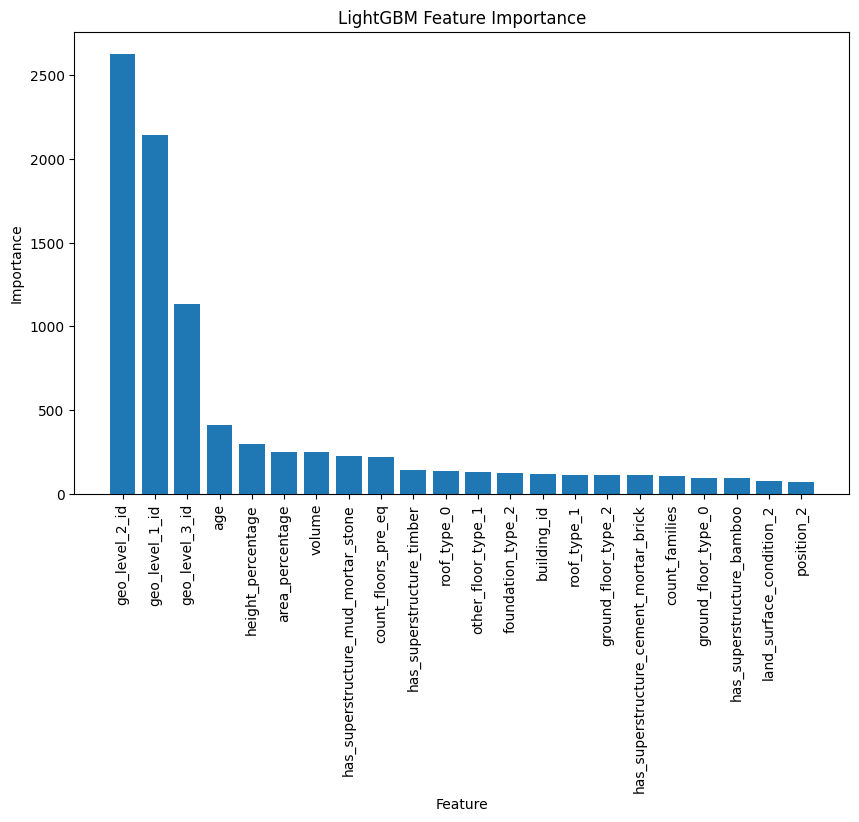

In [91]:
import matplotlib.pyplot as plt

# Get the feature importances
importances = best_lgbm.feature_importances_

# Get the names of the features
feature_names = X_selected_lgbm.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('LightGBM Feature Importance')
plt.show()